In [1]:
import pandas as pd
import numpy as np

# Plotting and correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

Use monthly number of EVs to predict distribution of other vehicle types

**Load data**

In [5]:
fuel_types = ['electric','plug-in hybrid electric','fuel cell','diesel','flex fuel','gasoline','gasoline hybrid','natural gas','propane']

# CA hourly CO2 emissions and demand

df = pd.read_csv('data/monthly_all_data.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0','emissions','demand','date'], axis=1, inplace=True)

print(f"shape: {df.shape}")
df.head()

shape: (96, 9)


,electric,plug-in hybrid electric,fuel cell,diesel,flex fuel,gasoline,gasoline hybrid,natural gas,propane
0,522436,305309,10117,590218,1208964,25998612,1298265,8456,93
1,509680,301459,9868,599397,1203595,25917176,1286366,8391,160
2,496924,297609,9619,608576,1198226,25835740,1274467,8326,227
3,484168,293759,9370,617755,1192857,25754304,1262568,8261,294
4,471412,289909,9121,626934,1187488,25672868,1250669,8196,361


**Correlation**

<AxesSubplot: >

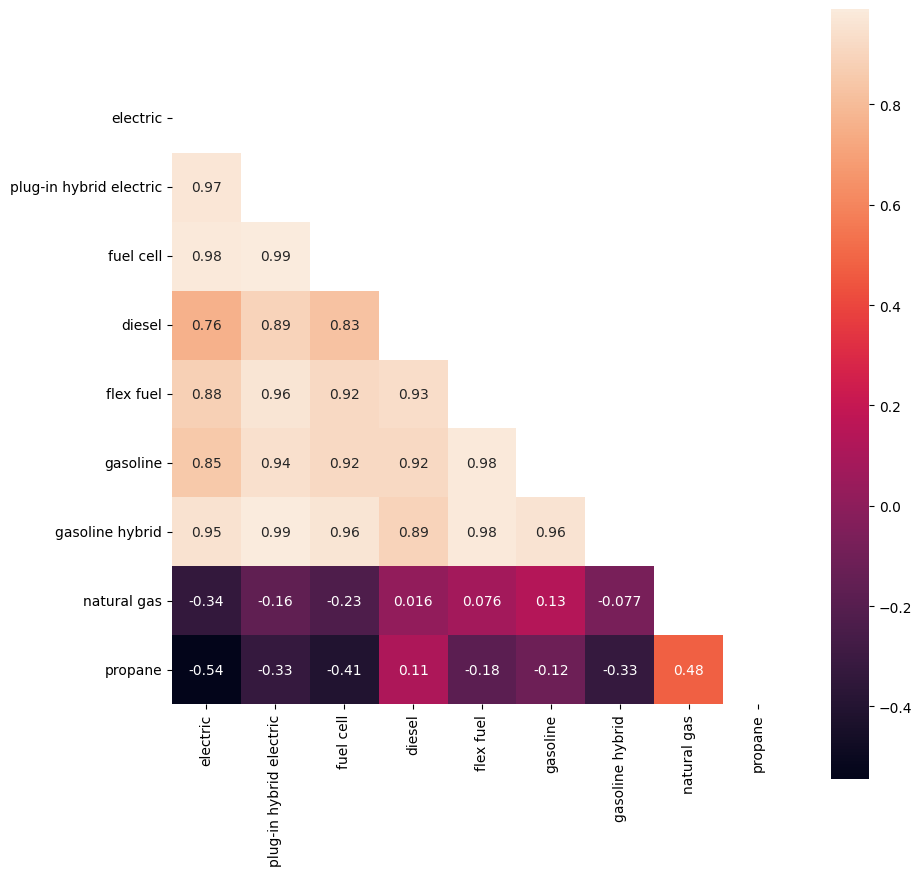

In [6]:
correlation = df.corr(method = 'pearson')
plt.subplots(figsize = (10,10))
masked = np.triu(np.ones_like(correlation, dtype=bool)) 
sns.heatmap(correlation,mask=masked,square = True, annot = True)

**Model**

In [8]:
models = {}

for fuel in fuel_types:
    if fuel != 'electric':
        X_removal_list = fuel_types.copy()
        X_removal_list.remove('electric')

        y_removal_list = fuel_types.copy()
        y_removal_list.remove(fuel)

        X = df.drop(columns=X_removal_list)
        y = df.drop(columns=y_removal_list)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
        distribution = {'n_estimators': [5,10,20,30,50,100,200]}

        forest = RandomForestRegressor()

        random_rf = RandomizedSearchCV(estimator = forest, param_distributions = distribution, n_iter=40)                      
        random_rf.fit(X_train,  y_train)

        print(f'Electric and {fuel}')
        print(f'Training data score: {random_rf.score(X_train,  y_train)}; testing data score: {random_rf.score(X_test, y_test)}\n')

        models[fuel] = random_rf

Electric and plug-in hybrid electric
Training data score: 0.9997885268432337; testing data score: 0.9989508850115018

Electric and fuel cell
Training data score: 0.9996756479100475; testing data score: 0.9984375368511762

Electric and diesel
Training data score: 0.9995540221493943; testing data score: 0.9961413184740924

Electric and flex fuel
Training data score: 0.9998226964876256; testing data score: 0.9985164827771698

Electric and gasoline
Training data score: 0.9992910308138478; testing data score: 0.9981945891204709

Electric and gasoline hybrid
Training data score: 0.999285529295042; testing data score: 0.9986851179349053

Electric and natural gas
Training data score: 0.9978946259934093; testing data score: 0.9927069220441821

Electric and propane
Training data score: 0.9966039468197547; testing data score: 0.9923929807598069



Test case

In [11]:
TEST_EV_NUM = 5509680

print(f'Given {TEST_EV_NUM} EVs, predicted number of other vehicle types:')
for model in models:
    prediction = int(models[model].predict([[TEST_EV_NUM]])[0])
    print(f"{prediction} {model} cars")


Given 5509680 EVs, predicted number of other vehicle types:
299919 plug-in hybrid electric cars
9967 fuel cell cars
595174 diesel cars
1204239 flex fuel cars
25900888 gasoline cars
1281606 gasoline hybrid cars
8371 natural gas cars
166 propane cars
